In [11]:
import math
import torch
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
import yaml
import os
import supervision as sv
import pandas as pd

Ultralytics YOLOv8.0.117  Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
Setup complete  (12 CPUs, 31.9 GB RAM, 612.8/930.9 GB disk)


In [2]:
model = YOLO('./runs/detect/train7/weights/best.pt')
# 모델 names 저장
names = model.names

# metrics 출력
metrics = model.val()
metrics.confusion_matrix

Ultralytics YOLOv8.0.117  Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
Model summary (fused): 268 layers, 68153421 parameters, 0 gradients
val: Scanning C:\Users\a\Desktop\OptimizedProject\YOLOV8\datasets\OOA_Data_v13\valid2\labels.cache... 810 images, 0 backgrounds, 0 corrupt: 100%|██████████| 810/810 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.28it/s]
                   all        810       1136      0.907      0.835      0.892      0.819
             back_pack        810         47      0.905      0.915      0.921        0.8
                  bike        810         36      0.972      0.969      0.978      0.834
           bike_helmet        810         31      0.921      0.903      0.954      0.857
              bookcase        810         27        0.9      0.926      0.954      0.849
                bottle        810         26      0.943      0.635

In [14]:
df = pd.DataFrame(metrics.results_dict, index=[0])
df

,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),fitness
0,0.907234,0.834702,0.891692,0.818575,0.825887


In [20]:
names2 = names
names2[32] = 'background'
print(names2)

{0: 'back_pack', 1: 'bike', 2: 'bike_helmet', 3: 'bookcase', 4: 'bottle', 5: 'calculator', 6: 'desk_chair', 7: 'desk_lamp', 8: 'desktop_computer', 9: 'file_cabinet', 10: 'headphones', 11: 'keyboard', 12: 'laptop_computer', 13: 'letter_tray', 14: 'mobile_phone', 15: 'monitor', 16: 'mouse', 17: 'mug', 18: 'paper_notebook', 19: 'pen', 20: 'phone', 21: 'printer', 22: 'projector', 23: 'punchers', 24: 'ring_binder', 25: 'ruler', 26: 'scissors', 27: 'speaker', 28: 'stapler', 29: 'tape_dispenser', 30: 'trash_can', 32: 'background'}


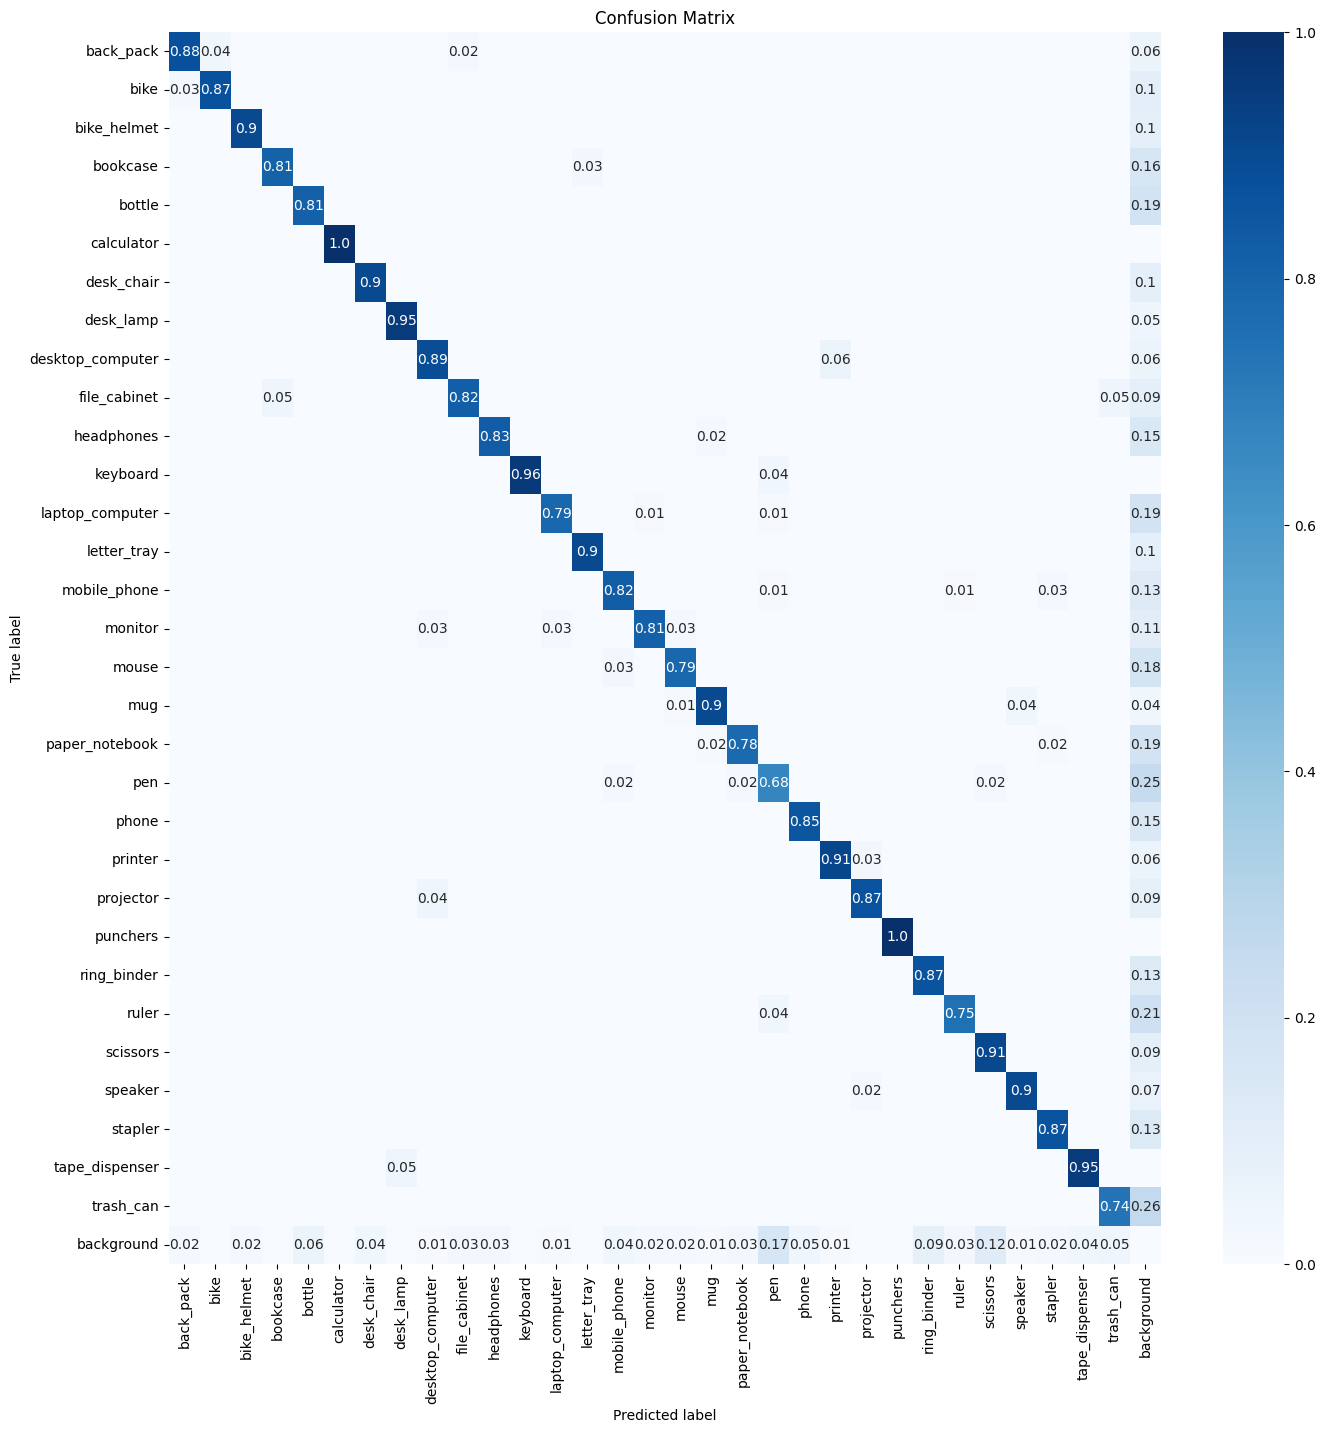

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 결과값 = cm
cm = metrics.confusion_matrix.matrix

# Class 별 % 값으로 변경
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 0.1이하 표현 하지않음.
annotations = np.where(cm_percentage >= 0.01, np.round(cm_percentage, 2), '')


plt.figure(figsize=(16, 16))

# Heatmap 설정
sns.heatmap(cm_percentage, annot=annotations, fmt='', cmap='Blues', xticklabels=names2.values(), yticklabels=names2.values())

plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()